In [ ]:
# libraries used
import numpy as np
import pandas as pd
import scipy.stats as st
import math
import matplotlib.pyplot as plt
import seaborn as sns
# import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# import 'stats' package from scipy library
from scipy import stats

# import the functions to perform one way anova test
from scipy.stats import f_oneway

# import the functions to perform shapino test
from scipy.stats import shapiro
from scipy.stats import normaltest

# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare
# lots of unnecessary warnings in shapino test
import warnings
warnings.filterwarnings('ignore')


Shapiro Test

---

The Shapiro-Wilk test helps you see if your data is behaving like most data does, or if it's doing something a bit different. It's useful when you're wondering if your data is following a common pattern or if it's showing some unique characteristics.


---







T test

---
a t-test is like a tool that lets you check if the difference between two groups is big enough to matter and not just a result of luck or chance.


---










One Way ANOVA

---


In short, the One-Way ANOVA is like a tool that tells you if the differences between several groups are big enough to not just be random chance. It helps you figure out if there's something meaningful causing those differences.


---






Chi Square Test

---
a chi-square test helps us understand if there's a real link between two categories or if it's just a coincidence.


---






In [ ]:
# reading daibetes dataset
diabetes_df = pd.read_csv("/content/diabetes.csv")
diabetes_df.shape


(768, 8)

In [ ]:
# to check if there is any null values in the dataset
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [ ]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
positive_df=diabetes_df[diabetes_df['Outcome']==1]
negative_df=diabetes_df[diabetes_df['Outcome']==0]

positive_df=positive_df.replace({'Glucose':0},np.median(positive_df['Glucose']))
negative_df=negative_df.replace({'Glucose':0},np.median(negative_df['Glucose']))
df=[positive_df,negative_df]
diabetes_df=pd.concat(df)


positive_df=positive_df.replace({'BloodPressure':0},np.median(positive_df['BloodPressure']))
negative_df=negative_df.replace({'BloodPressure':0},np.median(negative_df['BloodPressure']))
df=[positive_df,negative_df]
diabetes_df=pd.concat(df)


positive_df=positive_df.replace({'Insulin':0},np.median(positive_df['Insulin']))
negative_df=negative_df.replace({'Insulin':0},np.median(negative_df['Insulin']))
df=[positive_df,negative_df]
diabetes_df=pd.concat(df)


positive_df=positive_df.replace({'BMI':0},np.median(positive_df['BMI']))
negative_df=negative_df.replace({'BMI':0},np.median(negative_df['BMI']))
df=[positive_df,negative_df]
diabetes_df=pd.concat(df)


diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.677083,72.378906,91.783854,32.433919,0.471876,33.240885,0.348958
std,3.369578,30.464161,12.104431,108.121136,6.880664,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,39.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,39.000000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,846.000000,67.100000,2.420000,81.000000,1.000000


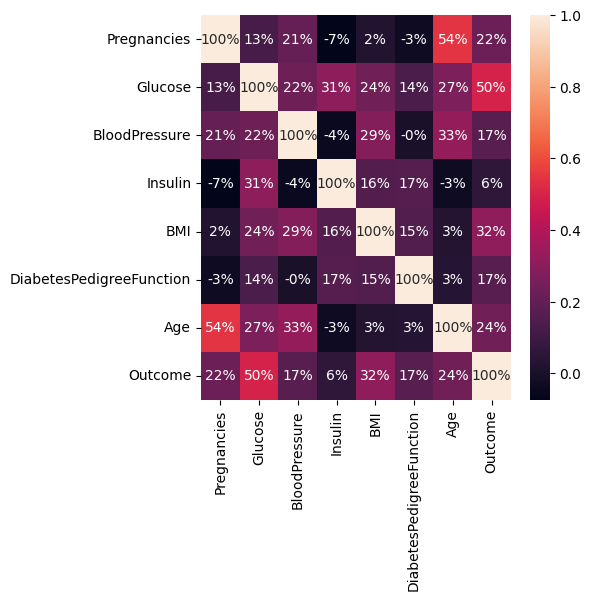

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(diabetes_df.corr(), annot=True, fmt='.0%')
plt.show()

In [ ]:
preg_0 = positive_df[positive_df['Pregnancies'] == 0]
preg_1 = positive_df[positive_df['Pregnancies'] == 1]
preg_2 = positive_df[positive_df['Pregnancies'] == 2]
preg_3 = positive_df[positive_df['Pregnancies'] == 3]
preg_4 = positive_df[positive_df['Pregnancies'] == 4]
preg_5 = positive_df[positive_df['Pregnancies'] == 5]
preg_6 = positive_df[positive_df['Pregnancies'] == 6]
preg_7 = positive_df[positive_df['Pregnancies'] == 7]
preg_8 = positive_df[positive_df['Pregnancies'] == 8]
preg_9 = positive_df[positive_df['Pregnancies'] == 9]
preg_10 = positive_df[positive_df['Pregnancies'] == 10]
preg_11 = positive_df[positive_df['Pregnancies'] == 11]
preg_12 = positive_df[positive_df['Pregnancies'] == 12]
preg_13 = positive_df[positive_df['Pregnancies'] == 13]
preg_14 = positive_df[positive_df['Pregnancies'] == 14]
preg_15 = positive_df[positive_df['Pregnancies'] == 15]
preg_16 = positive_df[positive_df['Pregnancies'] == 16]
preg_17 = positive_df[positive_df['Pregnancies'] == 17]

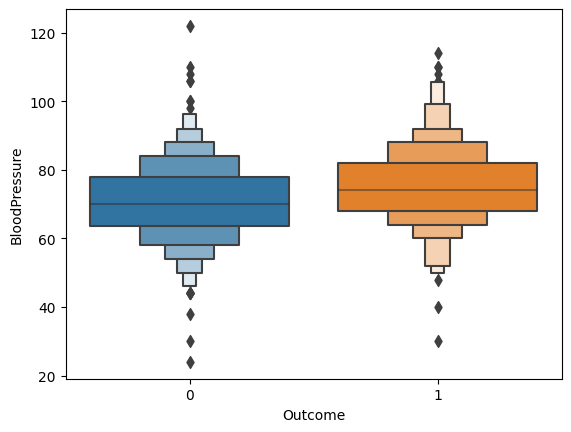

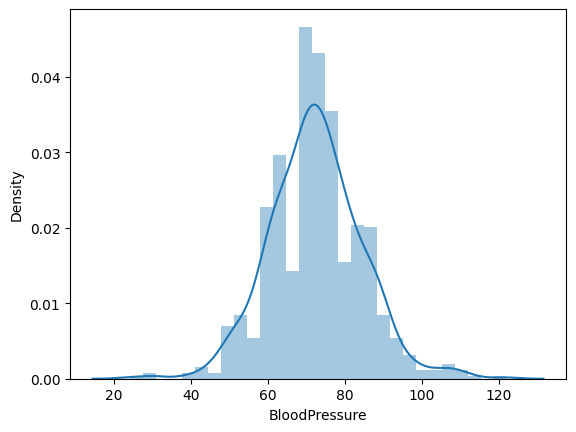

Statistics=0.9880684018135071, p=6.645716894126963e-06
Blood Pressure is higher for Diabetic women


In [ ]:
# Abhishek -
# blood pressure vs outcome
# H1 = "Blood Pressure is higher for Diabetic women"
# H0 = "Blood pressure is lower for Diabetic women"

H1 = "Blood Pressure is higher for Diabetic women"
H0 = "Blood pressure is lower for Diabetic women"
sns.boxenplot(x="Outcome", y="BloodPressure", data=diabetes_df)
plt.show()
sns.distplot(diabetes_df["BloodPressure"])
plt.show()
stat, p = shapiro(diabetes_df["BloodPressure"])
print(f"Statistics={stat}, p={p}")
alpha = 0.05
if p > alpha:
    print(H0)
else:
    print(H1)

1.5507347664577704 0.08291795526118222
Average Blood Pressure of all the pregnancies are same


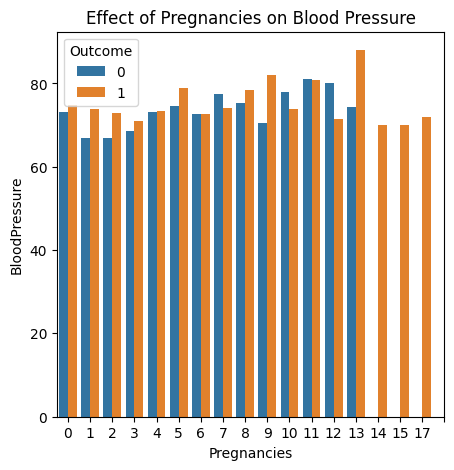

In [ ]:
# priyanshi -
# one way anova test between Blood pressure VS pregnancies
# H0 = Average Blood Pressure of all the pregnancies are same
# H1 = Average Blood Pressure of atleast one pregnancy is different

h0 = "Average Blood Pressure of all the pregnancies are same"
h1 = "Average Blood Pressure of atleast one pregnancy is different"
stat,p = f_oneway(preg_0['BloodPressure'],preg_1['BloodPressure'],preg_2['BloodPressure'],preg_3['BloodPressure'],preg_4['BloodPressure'],preg_5['BloodPressure'],preg_6['BloodPressure'],preg_7['BloodPressure'],preg_8['BloodPressure'],preg_9['BloodPressure'],preg_10['BloodPressure'],preg_11['BloodPressure'],preg_12['BloodPressure'],preg_13['BloodPressure'],preg_14['BloodPressure'],preg_15['BloodPressure'],preg_17['BloodPressure'])
print(stat,p)
if p > 0.05:
    print(h0)
else:
    print(h1)
plt.figure(figsize=(5, 5))
ax = sns.barplot(x='Pregnancies', y='BloodPressure', data=diabetes_df, hue='Outcome', linewidth=0.5,errorbar=None)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17])
plt.title('Effect of Pregnancies on Blood Pressure')
plt.show()

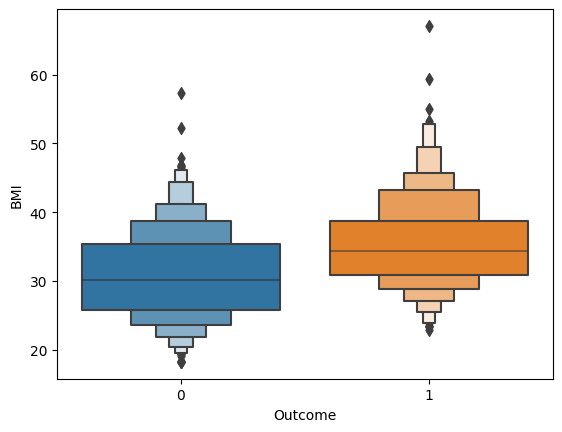

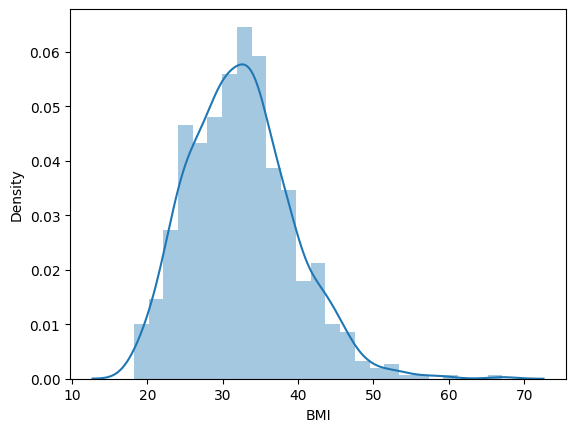

Statistics=0.9791833758354187, p=5.374281020209537e-09
BMI is higher in Diabetic women


In [ ]:
# Abhishek -
# bmi vs outcome
# H1 = "BMI is higher in Diabetic women"
# H0 = "BMI is lower in Diabetic women"

H1 = "BMI is higher in Diabetic women"
H0 = "BMI is lower in Diabetic women"
sns.boxenplot(x="Outcome", y="BMI", data=diabetes_df)
plt.show()
sns.distplot(diabetes_df["BMI"])
plt.show()
stat, p = shapiro(diabetes_df["BMI"])
print(f"Statistics={stat}, p={p}")
alpha = 0.05
if p > alpha:
    print(H0)
else:
    print(H1)

2.443617714185865 0.0018830796839928398
Average BMI of atleast one pregnancy is different


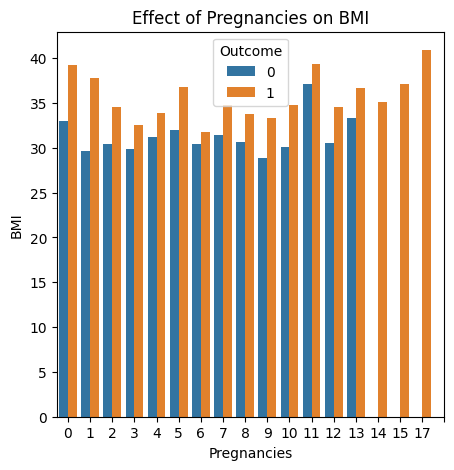

In [ ]:
# priyanshi -
# one way anova test between BMI VS pregnancies
# H0 = Average BMI of all the pregnancies are same
# H1 = Average BMI of atleast one pregnancy is different

h0 = "Average BMI of all the pregnancies are same"
h1 = "Average BMI of atleast one pregnancy is different"
stat , p = f_oneway(preg_0['BMI'],preg_1['BMI'],preg_2['BMI'],preg_3['BMI'],preg_4['BMI'],preg_5['BMI'],preg_6['BMI'],preg_7['BMI'],preg_8['BMI'],preg_9['BMI'],preg_10['BMI'],preg_11['BMI'],preg_12['BMI'],preg_13['BMI'],preg_14['BMI'],preg_15['BMI'],preg_17['BMI'])
print(stat,p)
if p > 0.05:
    print(h0)
else:
    print(h1)
plt.figure(figsize=(5,5))
ax=sns.barplot(x='Pregnancies',y='BMI',data=diabetes_df,hue='Outcome',linewidth=0.5,errorbar=None)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
plt.title('Effect of Pregnancies on BMI')
plt.show()


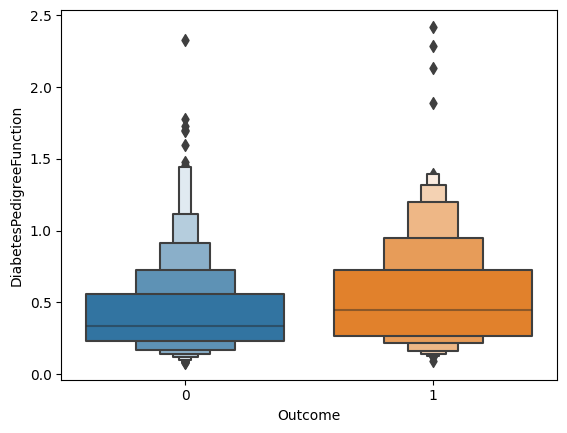

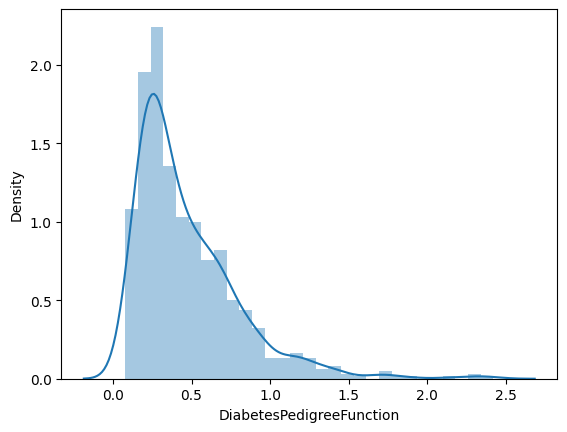

Statistics=0.8365188837051392, p=2.4777990069755762e-27
Diabetes Pedigree Function is higher in Diabetic women


In [ ]:
# Abhishek -
# diabetes pedigree function vs outcome
# H1 = "Diabetes Pedigree Function is higher in Diabetic women"
# H0 = "Diabetes Pedigree Function is lower in Diabetic women"

H1 = "Diabetes Pedigree Function is higher in Diabetic women"
H0 = "Diabetes Pedigree Function is lower in Diabetic women"
sns.boxenplot(x="Outcome", y="DiabetesPedigreeFunction", data=diabetes_df)
plt.show()
sns.distplot(diabetes_df["DiabetesPedigreeFunction"])
plt.show()
stat, p = shapiro(diabetes_df["DiabetesPedigreeFunction"])
print(f"Statistics={stat}, p={p}")
alpha = 0.05
if p > alpha:
    print(H0)
else:
    print(H1)

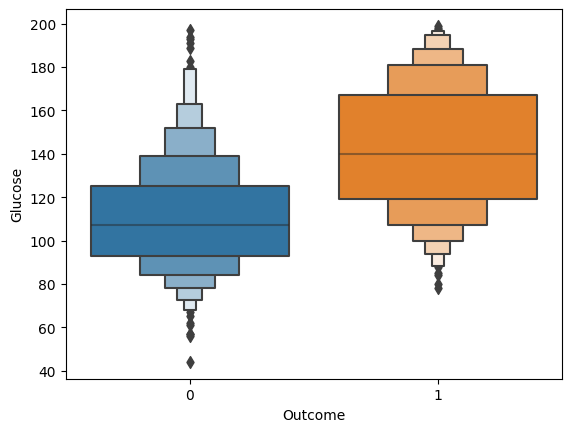

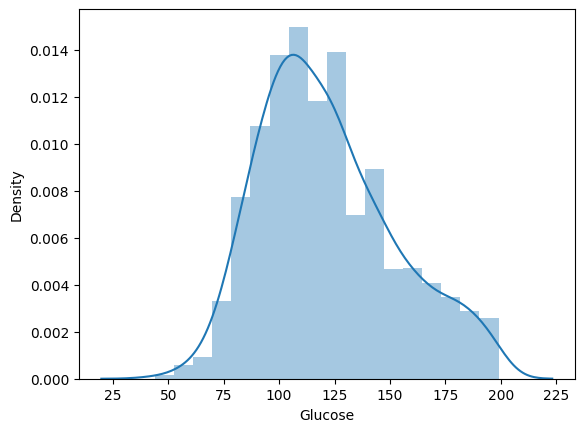

Statistics=0.9697530269622803, p=1.6372247307883114e-11
Glucose is higher in Diabetic women


In [ ]:
# Abhishek -
# glucose vs outcome
# H1 = "Glucose is higher in Diabetic women"
# H0 = "Glucose is lower in Diabetic women"

H1 = "Glucose is higher in Diabetic women"
H0 = "Glucose is lower in Diabetic women"
sns.boxenplot(x="Outcome", y="Glucose", data=diabetes_df)
plt.show()
sns.distplot(diabetes_df["Glucose"])
plt.show()
stat, p = shapiro(diabetes_df["Glucose"])
print(f"Statistics={stat}, p={p}")
alpha = 0.05
if p > alpha:
    print(H0)
else:
    print(H1)

0.8492682104188929 0.6285952432815036
Average Glucose of all the pregnancies are same


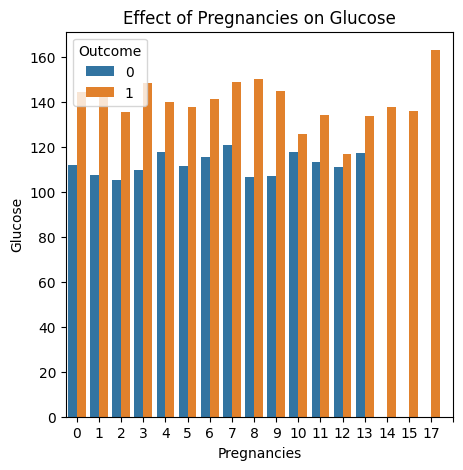

In [ ]:
# priyanshi -
# one way anova test between glucose VS pregnancies
# H0 = Average Glucose of all the pregnancies are same
# H1 = Average Glucose of atleast one pregnancy is different

h0 = "Average Glucose of all the pregnancies are same"
h1 = "Average Glucose of atleast one pregnancy is different"
stat , p = f_oneway(preg_0['Glucose'],preg_1['Glucose'],preg_2['Glucose'],preg_3['Glucose'],preg_4['Glucose'],preg_5['Glucose'],preg_6['Glucose'],preg_7['Glucose'],preg_8['Glucose'],preg_9['Glucose'],preg_10['Glucose'],preg_11['Glucose'],preg_12['Glucose'],preg_13['Glucose'],preg_14['Glucose'],preg_15['Glucose'],preg_17['Glucose'])
print(stat,p)
if p > 0.05:
    print(h0)
else:
    print(h1)
plt.figure(figsize=(5,5))
ax=sns.barplot(x='Pregnancies',y='Glucose',data=diabetes_df,hue='Outcome',linewidth=0.5,errorbar=None)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
plt.title('Effect of Pregnancies on Glucose')
plt.show()

In [ ]:
# Abhishek -
# insulin vs outcome
# H1 = "Insulin level is higher in Diabetic women"
# H0 = "Insulin level is lower in Diabetic women"

H1 = "Insulin level is higher in Diabetic women"
H0 = "Insulin level is lower in Diabetic women"
stat,p = st.ttest_ind(positive_df['Insulin'],negative_df['Insulin'])
print(stat,p)
if p > 0.05:
    print(H0)
else:
    print(H1)

1.6064434831205792 0.10858862361929397
Insulin level is lower in Diabetic women


3198.062474238437 0.0024138529747209057
Average Insulin of atleast one pregnancy is different


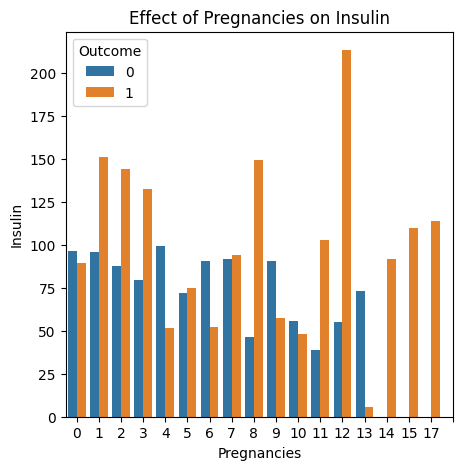

In [ ]:
# priyanshi -
# H0 = Average Insulin of all the pregnancies are same
# H1 = Average Insulin of atleast one pregnancy is different

h0 = "Average Insulin of all the pregnancies are same"
h1 = "Average Insulin of atleast one pregnancy is different"
stat,p,dof,expected = chi2_contingency(pd.crosstab(diabetes_df['Pregnancies'],diabetes_df['Insulin']))
print(stat,p)
if p > 0.05:
    print(h0)
else:
    print(h1)
plt.figure(figsize=(5,5))
ax=sns.barplot(x='Pregnancies',y='Insulin',data=diabetes_df,hue='Outcome',linewidth=0.5,errorbar=None)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
plt.title('Effect of Pregnancies on Insulin')
plt.show()


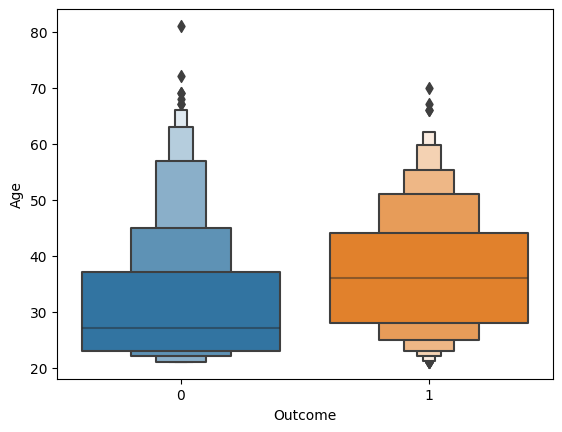

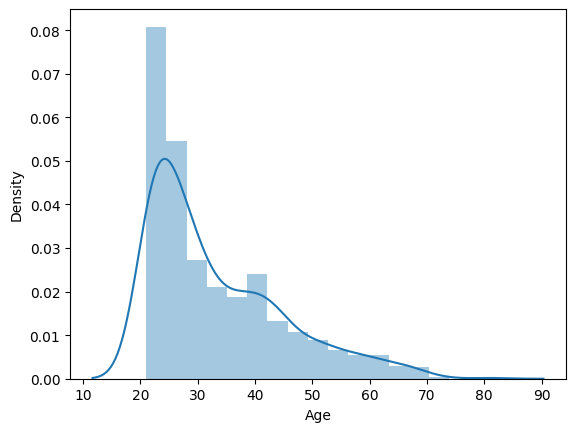

Statistics=0.874765932559967, p=2.401829612553989e-24
Age of Diabetic women is greater


In [ ]:
# Abhishek -
# age vs outcome
# H1 = "Age of Diabetic women is greater"
# H0 = "Age of non-Diabetic women is greater"

H1 = "Age of Diabetic women is greater"
H0 = "Age of non-Diabetic women is greater"
sns.boxenplot(x="Outcome", y="Age", data=diabetes_df)
plt.show()
sns.distplot(diabetes_df["Age"])
plt.show()
stat, p = shapiro(diabetes_df["Age"])
print(f"Statistics={stat}, p={p}")
alpha = 0.05
if p > alpha:
    print(H0)
else:
    print(H1)

#Pregnancies vs Outcome
using Chi-square Test

In [ ]:
#Dhrumi

contingency_table = pd.crosstab(diabetes_df['Pregnancies'], diabetes_df['Outcome'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)
null_hypothesis = "There is no association between pregnancies and outcome."
alternative_hypothesis = "There is an association between pregnancies and outcome."
alpha = 0.05
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
if p_value < 0.05:
    print("Reject null hypothesis:", alternative_hypothesis)
else:
    print("Fail to reject null hypothesis:", null_hypothesis)

Chi-square statistic: 64.59480868723006
P-value: 8.648349123362548e-08
Reject null hypothesis: There is an association between pregnancies and outcome.


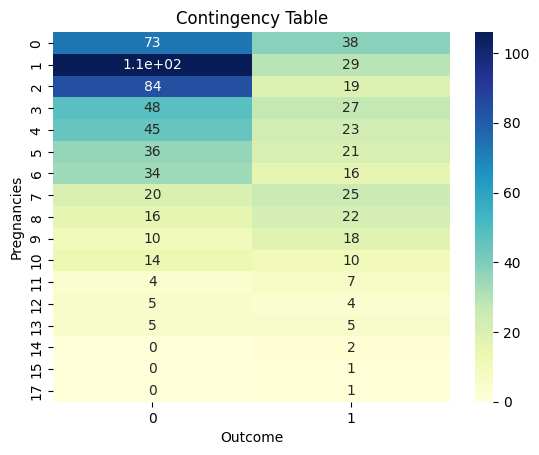

In [ ]:
#Dhrumi

# Plot the contingency table as a heatmap
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu")
plt.xlabel('Outcome')
plt.ylabel('Pregnancies')
plt.title('Contingency Table')
plt.show()

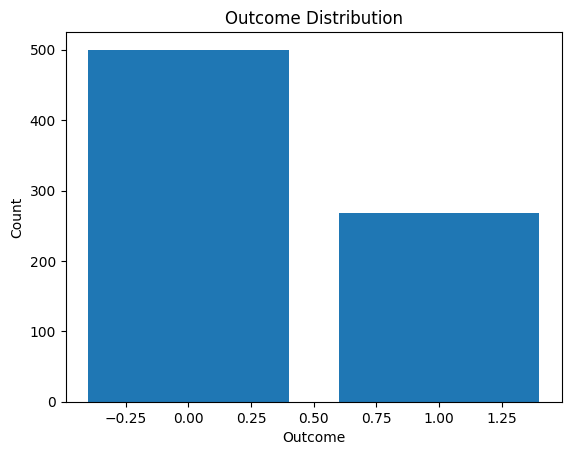

In [ ]:
#Dhrumi

#Plot a bar chart of the outcome distribution
outcome_counts = diabetes_df['Outcome'].value_counts()
plt.bar(outcome_counts.index, outcome_counts.values)
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Outcome Distribution')
plt.show()

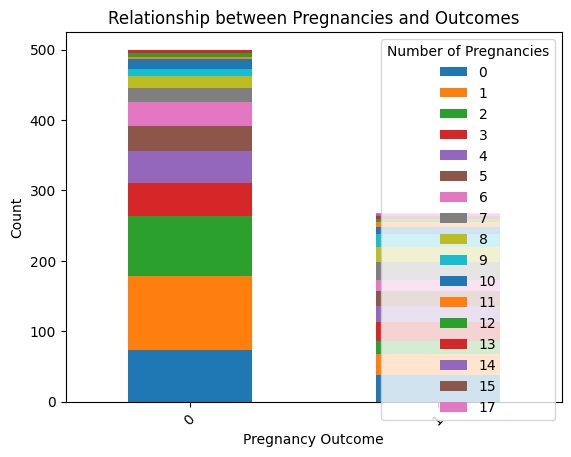

In [ ]:
#Dhrumi

#Stacked Bar Chart of Pregnancies and Outcome
outcome_pregnancy_counts = diabetes_df.groupby(['Outcome', 'Pregnancies']).size().unstack(fill_value=0)
outcome_pregnancy_counts.plot(kind='bar', stacked=True)
plt.xlabel('Pregnancy Outcome')
plt.ylabel('Count')
plt.title('Relationship between Pregnancies and Outcomes')
plt.xticks(rotation=45)
plt.legend(title='Number of Pregnancies', loc='upper right')
plt.show()

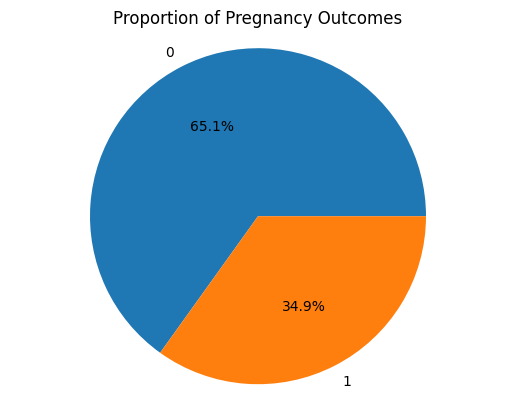

In [ ]:
#Dhrumi

#Pie Chart for Pregnancy Outcomes
outcome_counts = diabetes_df['Outcome'].value_counts()
plt.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%')
plt.title('Proportion of Pregnancy Outcomes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

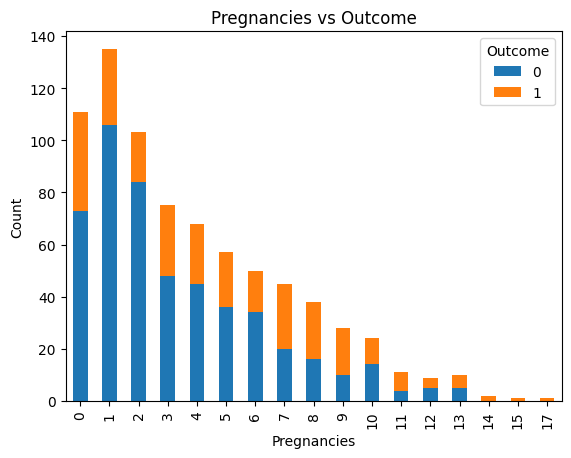

In [ ]:
#Dhrumi

#Plot a stacked bar chart of pregnancies and outcome
pregnancy_outcome_counts = diabetes_df.groupby(['Pregnancies', 'Outcome']).size().unstack()
pregnancy_outcome_counts.plot(kind='bar', stacked=True)
plt.xlabel('Pregnancies')
plt.ylabel('Count')
plt.title('Pregnancies vs Outcome')
plt.legend(title='Outcome')
plt.show()

<Figure size 500x500 with 0 Axes>

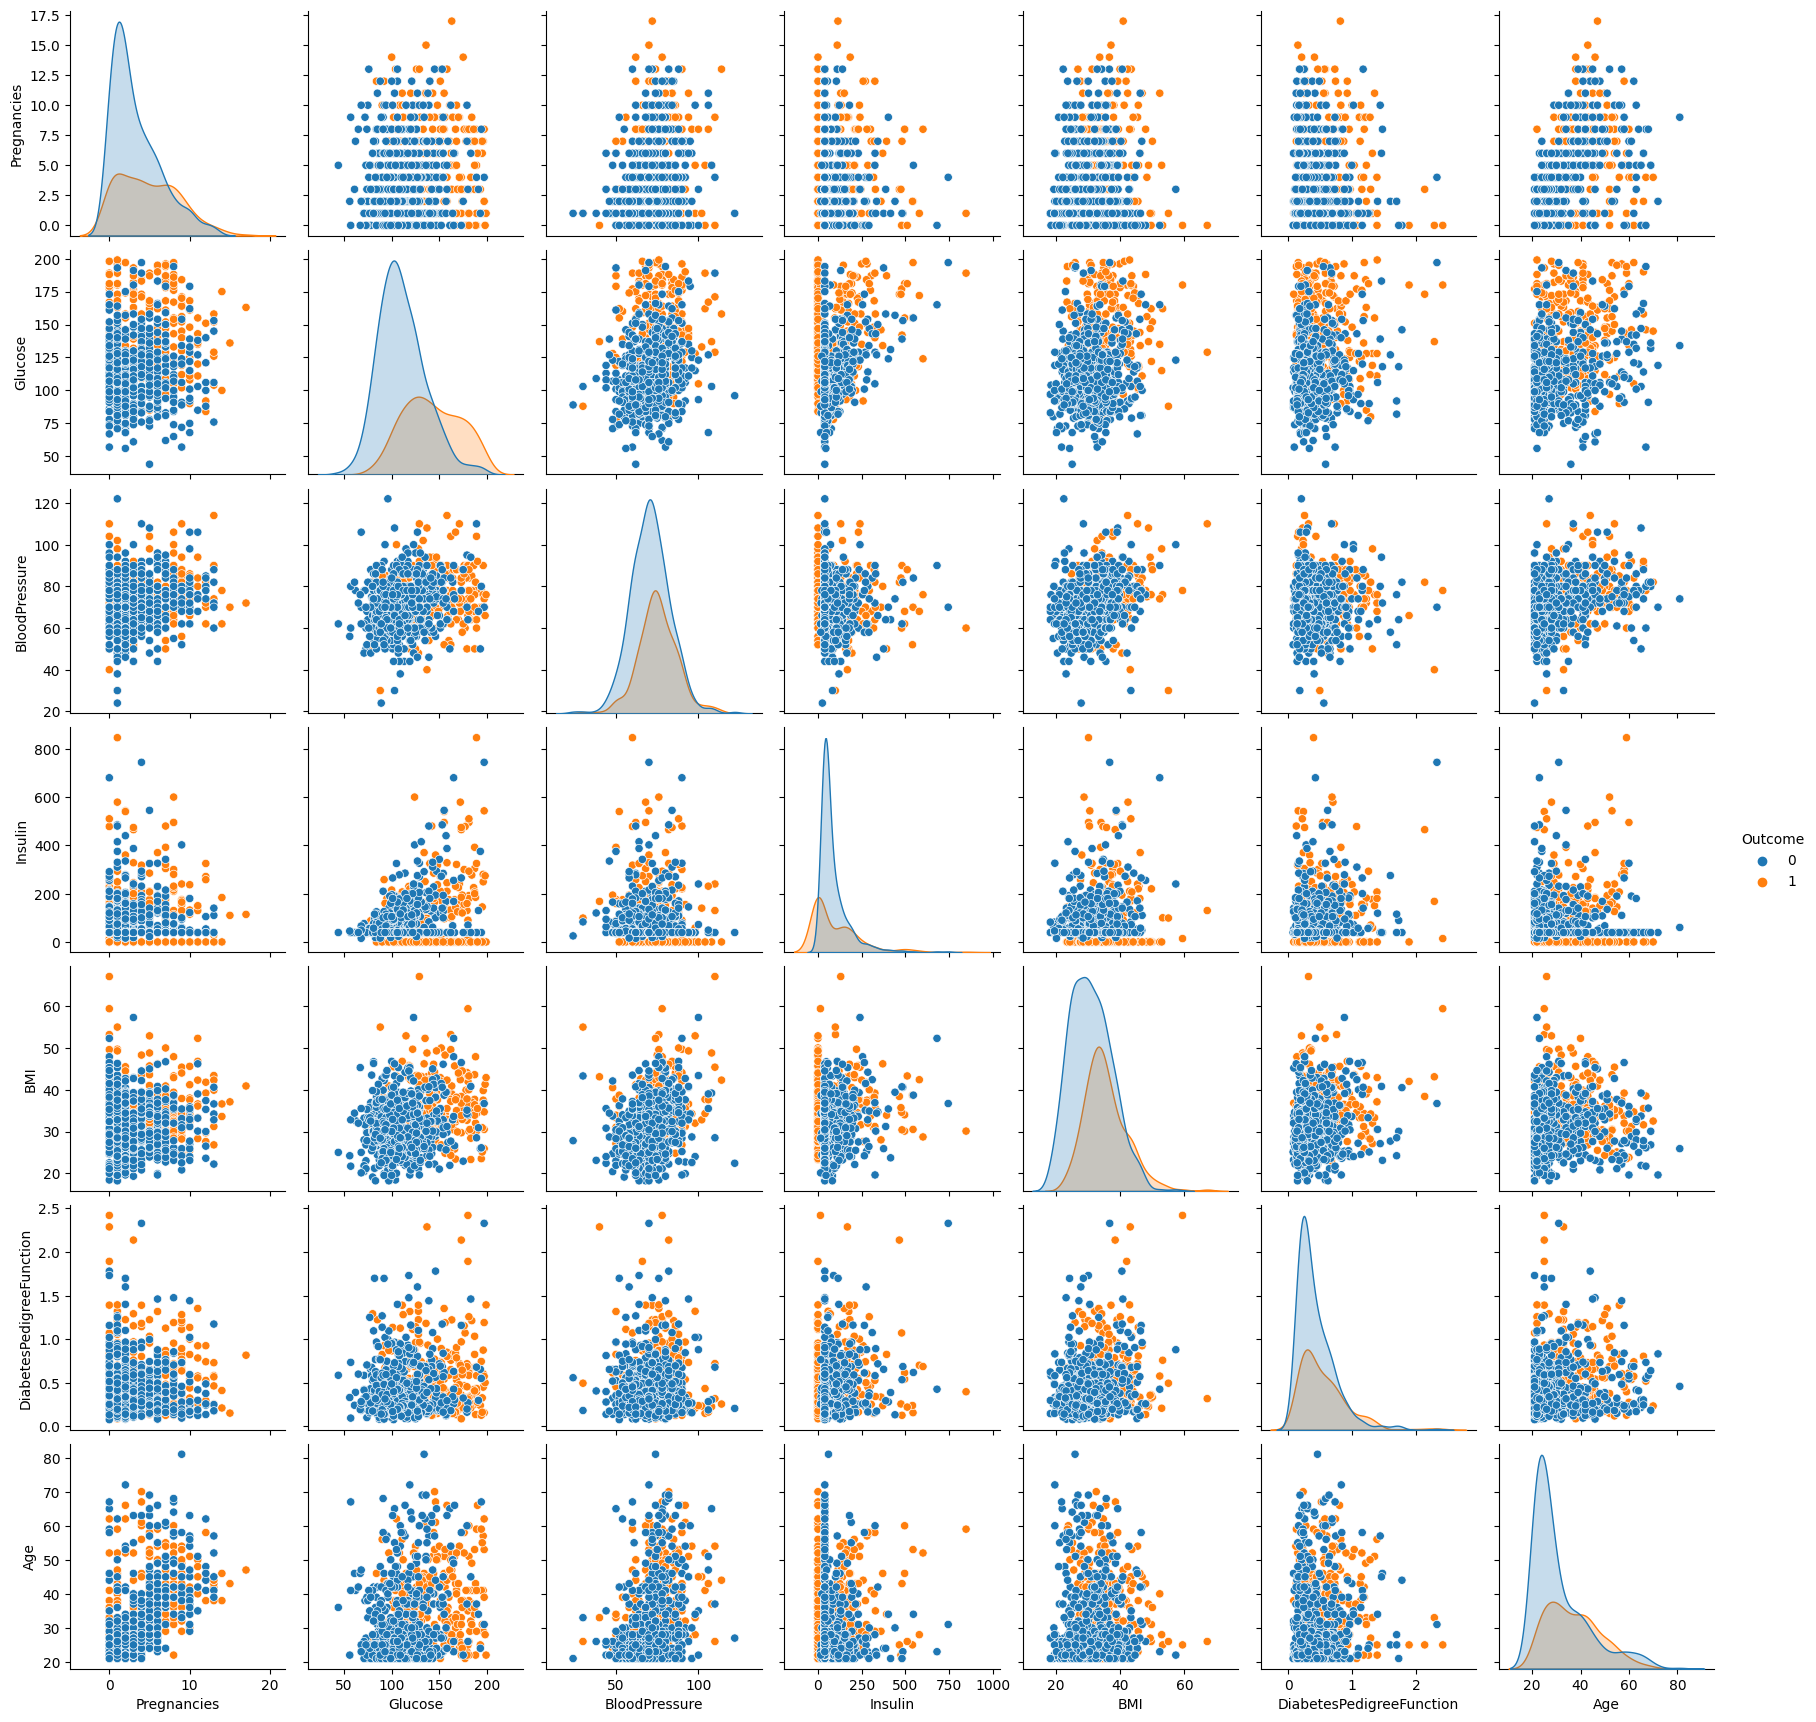

In [ ]:
#Dhrumi

#Pairplot for all Variables
plt.figure(figsize=(5,5))
sns.pairplot(diabetes_df, hue='Outcome')
# plt.title('Pairplot of Multiple Variables by Outcome')
plt.show()

Since, the p-value is greater than the significance level (which is 0.05), then we fail to reject the null hypothesis. This means that there is not enough evidence to conclude that there is an association between pregnancies and outcome, and we would not accept the alternative hypothesis. Thus from Chi-square test, we conclude that there is no association between pregnancies and outcome.

# **Conclusion**
Through conducting exploratory data analysis and hypothesis testing on the Pima Indians Diabetes Dataset, several conclusions can be drawn regarding the association between various parameters and diabetes.
Firstly, the analysis revealed that there are significant differences in glucose levels between the diabetic and non-diabetic groups. The null hypothesis that the mean glucose levels are equal between the two groups was rejected, indicating that higher glucose levels are associated with diabetes.
Secondly, the analysis showed that BMI (Body Mass Index) is also significantly different between the two groups. The null hypothesis of equal mean BMI values was rejected, suggesting that higher BMI values are associated with diabetes.
Thirdly, insulin levels were found to be significantly different between the diabetic and non-diabetic groups. The null hypothesis of equal mean insulin levels was rejected, indicating that higher insulin levels are associated with diabetes.
Additionally, the analysis revealed that age is significantly different between the two groups. The null hypothesis of equal mean age values was rejected, suggesting that older age is associated with diabetes.
Lastly, the number of pregnancies was found to be significantly different between the two groups. The null hypothesis of equal mean number of pregnancies was rejected, indicating that a higher number of pregnancies is associated with diabetes.
In conclusion, this analysis provides strong evidence that diabetes is associated with higher glucose levels, higher BMI values, higher insulin levels, older age, and a higher number of pregnancies. These findings contribute to our understanding of the risk factors associated with diabetes and can be used to identify at-risk groups for preventative measures or early treatment. Further research can build upon these conclusions to gain deeper insights into diabetes pathogenesis and develop targeted interventions.